<a href="https://colab.research.google.com/github/al-imran-sonet/CSE495A-Introduction-to-Robotics-/blob/main/Assignment_01/Assignment_session01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]
101
[ 0.  0.  0.  0.  0.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  0.  0.
  0.  0. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  0.  0.  0.
  0.  0.  0.  0.  0.  0. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 1.00000000e+00  1.05403023e+00  1.10806046e+00  1.16209069e+00
  1.21

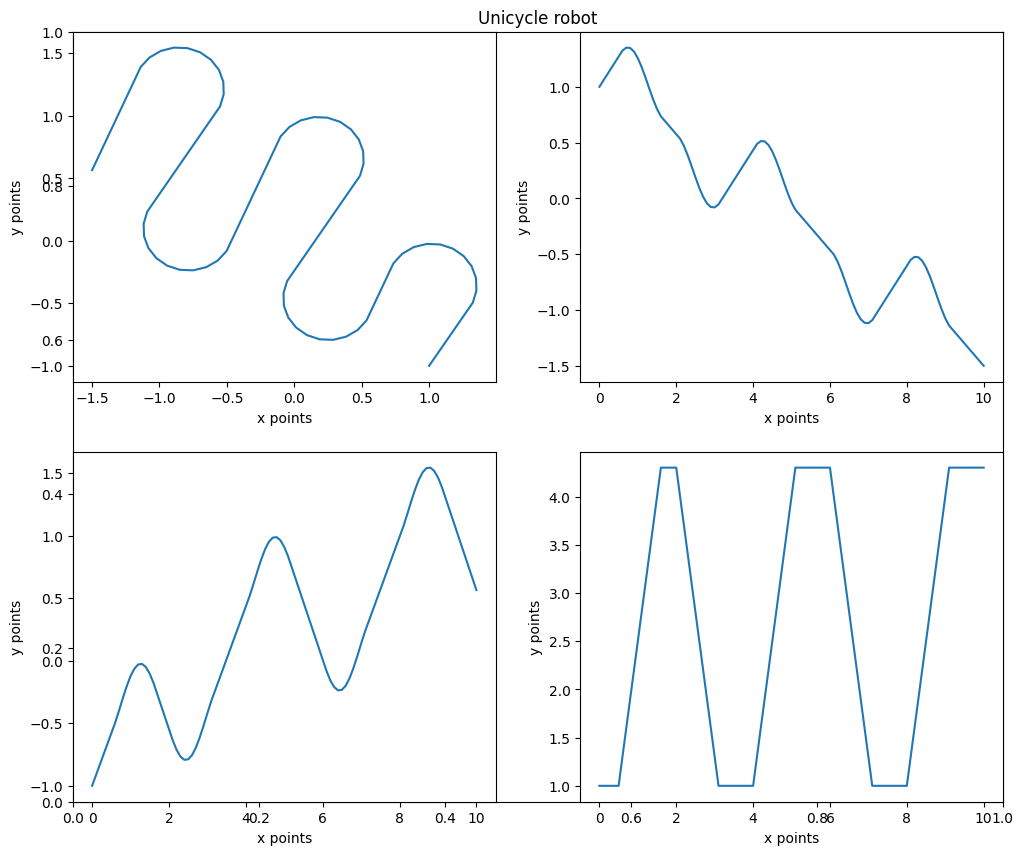

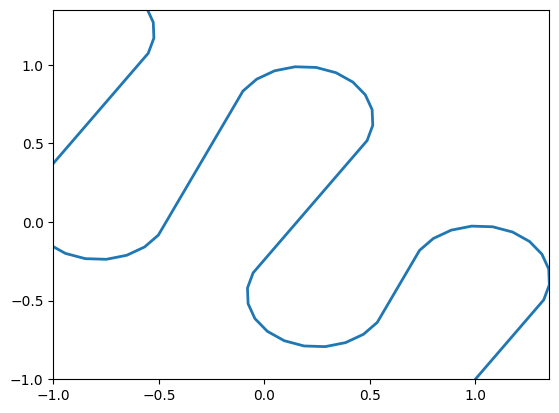

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib import animation

T=10
del_T= 0.1
t= np.arange(0,T+del_T,del_T)
print(t)
length=len(t)
print(length)

# Declaring the state vector
x=np.zeros(length)
y=np.zeros(length)
Q=np.zeros(length)


# Declaring the Control vector

v=1
w=np.zeros(length)

for i ,ti in enumerate(t):
  if 0.5 <= ti<=1.5:
    w[i]=3
  elif 2 <= ti<=3:
    w[i]=-3
  elif 4 <= ti<=5:
    w[i]=3
  elif 6 <= ti<=7:
    w[i]=-3
  elif 8 <= ti<=9:
    w[i]=3
  else:
    w[i]=0

print(w)

# Initial condition

x[0]=1
y[0]=-1
Q[0]=1

# eulers equation

for i in range(length-1):
  x[i+1]=x[i] + del_T * v * np.cos(Q[i])
  y[i+1]=y[i] + del_T * v * np.sin(Q[i])
  Q[i+1]=Q[i] + del_T * w[i]



print(x,"\n",y,"\n",Q)


plt.figure(figsize=(12,10))
plt.title("Unicycle robot")
plt.subplot(2,2,1)

plt.plot(x,y)
plt.xlabel("x points")
plt.ylabel("y points")


plt.subplot(2,2,2)
plt.plot(t,x)
plt.xlabel("x points")
plt.ylabel("y points")


plt.subplot(2,2,3)
plt.plot(t,y)
plt.xlabel("x points")
plt.ylabel("y points")


plt.subplot(2,2,4)
plt.plot(t,Q)
plt.xlabel("x points")
plt.ylabel("y points")


fig,ax=plt.subplots()
ax.set_xlim(min(y), max(x))
ax.set_ylim(min(y),max(x))
line, = ax.plot([], [], lw=2)

def init():
  line.set_data([], [])
  return line,

def update(frame):
  x_data = x[:frame]
  y_data = y[:frame]
  line.set_data(x_data, y_data)
  return line,

ani=animation.FuncAnimation(fig,update,frames=length,init_func=init,blit=True)


from IPython.display import HTML #for colab , its not necessary for vs code
HTML(ani.to_jshtml())










